In [1]:
import pandas as pd
import numpy as np
import seaborn as sns

results = pd.read_csv('results.csv', parse_dates=['date'])
shootouts = pd.read_csv('shootouts.csv', parse_dates=['date'])

In [2]:
modern_date = '2010-01-01'
mod_results = results[results['date'] >= modern_date].reset_index(drop=True)   #shows only results since input date
mod_shootouts = shootouts[shootouts['date'] >= modern_date].reset_index(drop=True)   #shows only shootouts since input date

mod_results.head()

,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral
0,2010-01-02,Iran,North Korea,1,0,Friendly,Doha,Qatar,True
1,2010-01-02,Qatar,Mali,0,0,Friendly,Doha,Qatar,False
2,2010-01-02,Syria,Zimbabwe,6,0,Friendly,Kuala Lumpur,Malaysia,True
3,2010-01-02,Yemen,Tajikistan,0,1,Friendly,Sana'a,Yemen,False
4,2010-01-03,Angola,Gambia,1,1,Friendly,Vila Real de Santo António,Portugal,True


In [3]:
mod_shootouts.head()

,date,home_team,away_team,winner
0,2010-01-25,Zambia,Nigeria,Nigeria
1,2010-06-29,Paraguay,Japan,Paraguay
2,2010-07-02,Uruguay,Ghana,Uruguay
3,2011-01-25,Japan,South Korea,Japan
4,2011-06-18,Costa Rica,Honduras,Honduras


In [4]:
#merges two dfs into one, puts NaN in 'winner' for games without shootout
mod_full = mod_results.merge(mod_shootouts, how='outer', on=['date', 'home_team', 'away_team'])
mod_full.head()

,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral,winner
0,2010-01-02,Iran,North Korea,1,0,Friendly,Doha,Qatar,True,NaN
1,2010-01-02,Qatar,Mali,0,0,Friendly,Doha,Qatar,False,NaN
2,2010-01-02,Syria,Zimbabwe,6,0,Friendly,Kuala Lumpur,Malaysia,True,NaN
3,2010-01-02,Yemen,Tajikistan,0,1,Friendly,Sana'a,Yemen,False,NaN
4,2010-01-03,Angola,Gambia,1,1,Friendly,Vila Real de Santo António,Portugal,True,NaN


In [5]:
#puts winning country in winner column, or 'Tie' otherwise, and puts 'Home', 'Away', or 'Tie' in winner_loc column
for x in range(len(mod_full)):
    if (pd.isna(mod_full['winner'][x])):   #avoids replacing values from shootouts
        if (mod_full['home_score'][x] > mod_full['away_score'][x]):
            mod_full.at[x, 'winner'] = mod_full['home_team'][x]
        else:
            if (mod_full['home_score'][x] < mod_full['away_score'][x]):
                mod_full.at[x, 'winner'] = mod_full['away_team'][x]
            else:
                mod_full.at[x, 'winner'] = 'Tie'
mod_full.head()

,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral,winner
0,2010-01-02,Iran,North Korea,1,0,Friendly,Doha,Qatar,True,Iran
1,2010-01-02,Qatar,Mali,0,0,Friendly,Doha,Qatar,False,Tie
2,2010-01-02,Syria,Zimbabwe,6,0,Friendly,Kuala Lumpur,Malaysia,True,Syria
3,2010-01-02,Yemen,Tajikistan,0,1,Friendly,Sana'a,Yemen,False,Tajikistan
4,2010-01-03,Angola,Gambia,1,1,Friendly,Vila Real de Santo António,Portugal,True,Tie


In [6]:
mod_full['winner_loc'] = ''
for x in range(len(mod_full)):
    if (mod_full['home_score'][x] > mod_full['away_score'][x]):
        mod_full.at[x, 'winner_loc'] = 'Home'
    else:
        if (mod_full['home_score'][x] < mod_full['away_score'][x]):
            mod_full.at[x, 'winner_loc'] = 'Away'
        else:
            mod_full.at[x, 'winner_loc'] = 'Tie'
mod_full.head()

,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral,winner,winner_loc
0,2010-01-02,Iran,North Korea,1,0,Friendly,Doha,Qatar,True,Iran,Home
1,2010-01-02,Qatar,Mali,0,0,Friendly,Doha,Qatar,False,Tie,Tie
2,2010-01-02,Syria,Zimbabwe,6,0,Friendly,Kuala Lumpur,Malaysia,True,Syria,Home
3,2010-01-02,Yemen,Tajikistan,0,1,Friendly,Sana'a,Yemen,False,Tajikistan,Away
4,2010-01-03,Angola,Gambia,1,1,Friendly,Vila Real de Santo António,Portugal,True,Tie,Tie


In [7]:
a = set(mod_full['home_team'])
b = set(mod_full['away_team'])
all_teams = a.union(b)   #all teams in dataset
eu_teams = ['Austria', 'Belgium', 'Bulgaria', 'Croatia', 'Cyprus', 'Czechia', 'Denmark', 'Estonia', 'Finland',
            'France', 'Germany', 'Greece', 'Hungary', 'Ireland', 'Italy', 'Latvia', 'Lithuania', 'Luxembourg',
            'Malta', 'Netherlands', 'Poland', 'Portugal', 'Romania', 'Slovakia', 'Slovenia', 'Spain', 'Sweden']

In [8]:
mod_eu = mod_full[(mod_full['home_team'].isin(eu_teams)) | (mod_full['away_team'].isin(eu_teams))]
mod_eu.head()

,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral,winner,winner_loc
41,2010-01-18,Finland,South Korea,0,2,Friendly,Málaga,Spain,True,South Korea,Away
47,2010-01-20,Oman,Sweden,0,1,Friendly,Muscat,Oman,False,Sweden,Away
48,2010-01-20,Thailand,Poland,1,3,King's Cup,Nakhon Ratchasima,Thailand,False,Poland,Away
52,2010-01-22,Latvia,South Korea,0,1,Friendly,Málaga,Spain,True,South Korea,Away
53,2010-01-23,Poland,Singapore,6,1,King's Cup,Nakhon Ratchasima,Thailand,True,Poland,Home


In [9]:
populations = pd.read_csv('Global Nations Economy -Population.csv')
populations = populations.replace(',','', regex=True)
populations.head()

,Country Name,2018,2017,2016,2015,2014
0,China,1392730000,1386395000,1378665000,1371220000,1364270000
1,India,1352642283,1338676779,1324517250,1310152392,1295600768
2,United States,326838199,325122128,323071755,320738994,318386329
3,Indonesia,267670549,264650969,261556386,258383257,255128076
4,Pakistan,212228288,207906210,203631356,199426953,195305012


In [10]:
asylum_2013 = [21030, 7145, 695, 7170, 126705, 95, 945, 8225, 4485, 66265, 1080, 26620, 1255, 195, 400, 1070, 
               18895, 2250, 13065, 17500, 15240, 500, 1495, 270, 440, 3210, 54270, 125, 55, 11930, 21305, 30585]
asylum_2014 = [22710, 11080, 1145, 14680, 202645, 155, 1450, 9430, 5615, 64310, 450, 64625, 1745, 375, 440, 
               1150, 42775, 1350, 24495, 28035, 8020, 440, 1545, 385, 330, 3620, 81185, 170, 65, 11415, 23560, 32785]
asylum_2015 = [44665, 20390, 1515, 20935, 476510, 230, 3275, 13205, 14780, 76165, 210, 83540, 2265, 330, 315, 2505, 
               177135, 1845, 44970, 88160, 12190, 895, 1260, 275, 330, 32345, 162450, 370, 150, 31115, 39445, 40160]
country_names = ['Belgium','Bulgaria', 'Czechia', 'Denmark', 'Germany', 'Estonia', 'Ireland', 'Greece', 'Spain', 
                 'France', 'Croatia', 'Italy', 'Cyprus', 'Latvia', 'Lithuania', 'Luxembourg', 'Hungary', 'Malta', 
                 'Netherlands', 'Austria', 'Poland', 'Portugal', 'Romania', 'Slovenia', 'Slovakia', 'Finland', 
                 'Sweden', 'Iceland', 'Liechtenstein', 'Norway', 'Switzerland', 'United Kingdom']
asylum = pd.DataFrame({'Country Name':country_names, 'asylum_2013':asylum_2013, 'asylum_2014':asylum_2014, 'asylum_2015':asylum_2015})
asylum.head()

,Country Name,asylum_2013,asylum_2014,asylum_2015
0,Belgium,21030,22710,44665
1,Bulgaria,7145,11080,20390
2,Czechia,695,1145,1515
3,Denmark,7170,14680,20935
4,Germany,126705,202645,476510


In [11]:
immigration =  pd.read_csv('immigration_raw.csv')
immigration = immigration.rename(columns={'Year':'Country Name', '2013':'immigrants_2013', 
                                          '2014':'immigrants_2014', '2015':'immigrants_2015'})
immigration_b = immigration[['Country Name', 'immigrants_2013', 'immigrants_2014', 'immigrants_2015']]
imm_asy = immigration_b.merge(asylum, on='Country Name', how='inner')

imm_asy['rate_2013'] = imm_asy['asylum_2013']/imm_asy['immigrants_2013']
imm_asy['rate_2014'] = imm_asy['asylum_2014']/imm_asy['immigrants_2014']
imm_asy['rate_2015'] = imm_asy['asylum_2015']/imm_asy['immigrants_2015']

imm_asy.head()

,Country Name,immigrants_2013,immigrants_2014,immigrants_2015,asylum_2013,asylum_2014,asylum_2015,rate_2013,rate_2014,rate_2015
0,Belgium,120078,123158,146626,21030,22710,44665,0.175136,0.184397,0.304619
1,Bulgaria,18570,26615,25223,7145,11080,20390,0.384760,0.416307,0.808389
2,Czechia,30124,29897,29602,695,1145,1515,0.023071,0.038298,0.051179
3,Denmark,60312,68388,78492,7170,14680,20935,0.118882,0.214658,0.266715
4,Germany,692713,884893,1571047,126705,202645,476510,0.182911,0.229005,0.303307


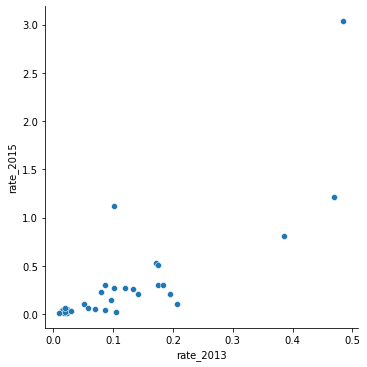

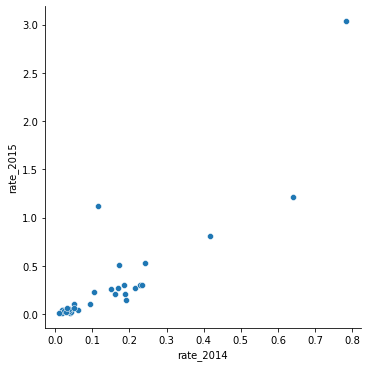

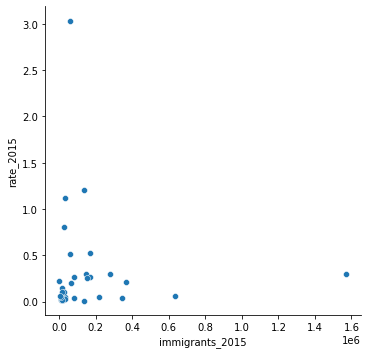

In [17]:
sns.relplot(x='rate_2013', y='rate_2015', data=imm_asy)
sns.relplot(x='rate_2014', y='rate_2015', data=imm_asy)
sns.relplot(x='immigrants_2015', y='rate_2015', data=imm_asy)